STUDENT NUMBER : C2106528

# 1-KNN

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Get data

In [ ]:
df = pd.read_csv('/content/sample_data/Coursework_1_data.csv')  # where the data is stored on google drive
test = pd.read_csv('/content/sample_data/Coursework_1_data.csv')

In [ ]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print('\nInformation of the df dataset...... \n')
print(df.info())
print('\nColumn names of the dataset...... \n', df.columns)


print('\nBelow is the first few lines of the dataset......\n', df.head(10))
print('\nBelow is the statistics of the dataset......\n', df.describe())


Information of the df dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-nu

In [ ]:
df.isna().sum()  # Missing data

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## i) Data exploration:

### Scatter plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32f56d0ad0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f56ea1d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f569b5d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f5650ad0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f55fcb10>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f55ca510>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f557fa90>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f5535ed0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f5535f10>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f54f94d0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f32f54e2d90>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f54a62d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f545d7d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f5412cd0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f32f53d

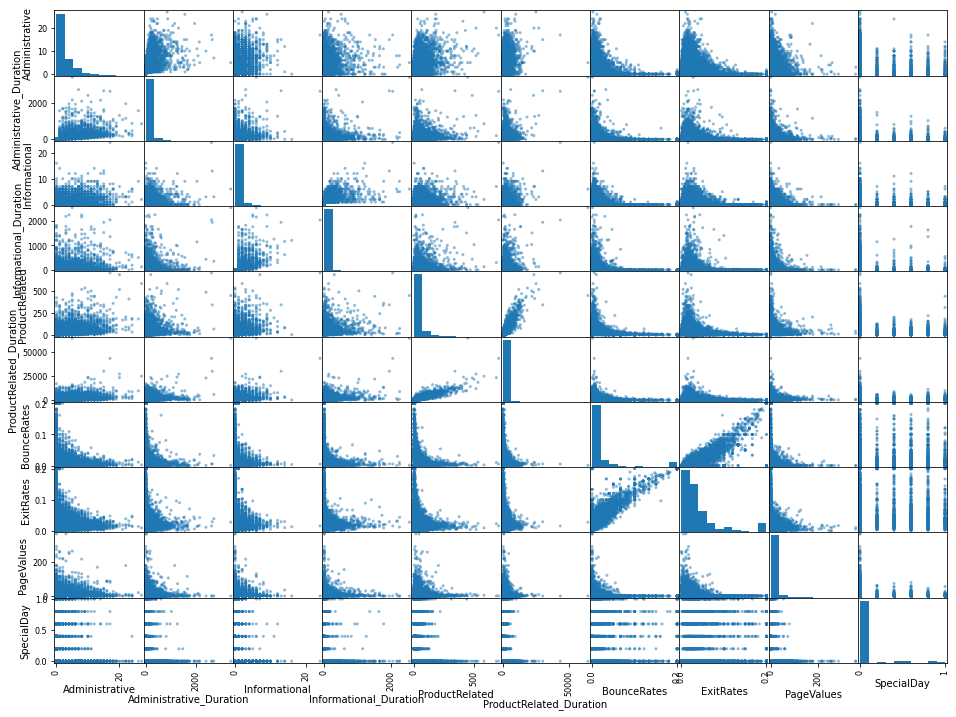

In [ ]:
# use scatter_matrix of pandas.plotting
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues','SpecialDay']], figsize=(16, 12))

### Box plot

       Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration   BounceRates     ExitRates    PageValues    SpecialDay
count    12330.000000             12330.000000   12330.000000            12330.000000    12330.000000             12330.000000  12330.000000  12330.000000  12330.000000  12330.000000
mean         2.315166                80.818611       0.503569               34.472398       31.731468              1194.746220      0.022191      0.043073      5.889258      0.061427
std          3.321784               176.779107       1.270156              140.749294       44.475503              1913.669288      0.048488      0.048597     18.568437      0.198917
min          0.000000                 0.000000       0.000000                0.000000        0.000000                 0.000000      0.000000      0.000000      0.000000      0.000000
25%          0.000000                 0.000000       0.000000                0.000000

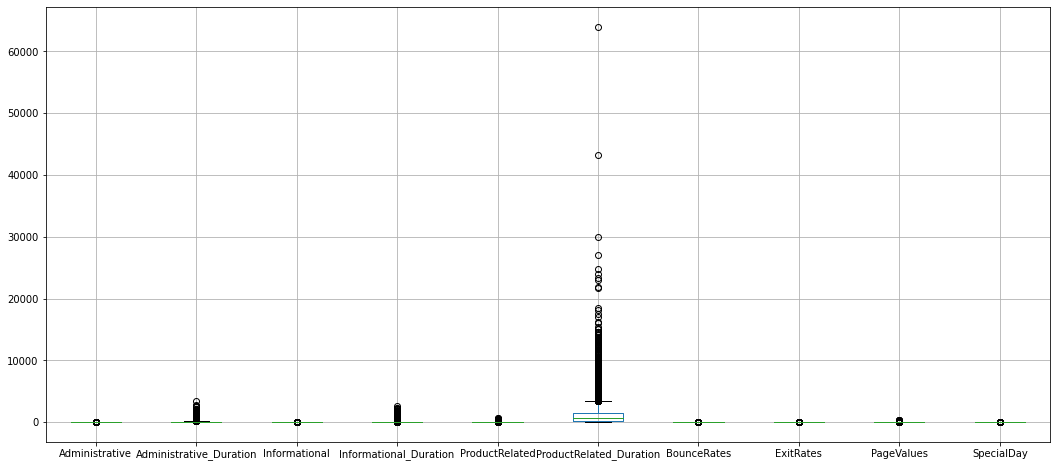

In [ ]:
print(df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']].describe())
df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']].boxplot(figsize=(18, 8))

### Correlation

In [ ]:
corr_matrix = df.corr() #relevance

### Histogram

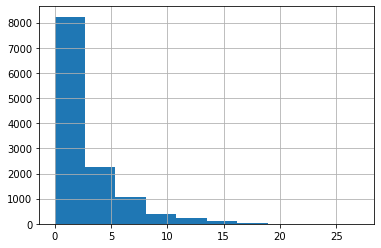

In [ ]:
df['Administrative'].hist()

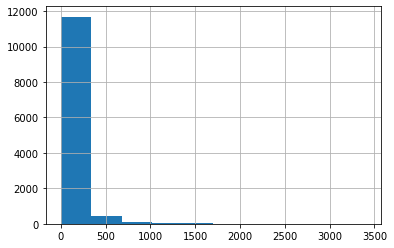

In [ ]:
df['Administrative_Duration'].hist()

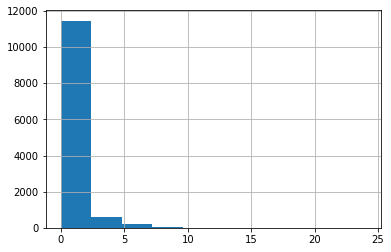

In [ ]:
df['Informational'].hist()

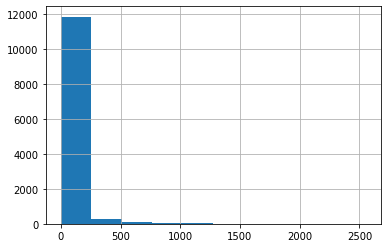

In [ ]:
df['Informational_Duration'].hist()

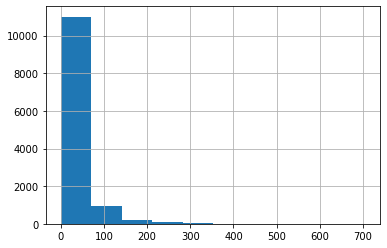

In [ ]:
df['ProductRelated'].hist()

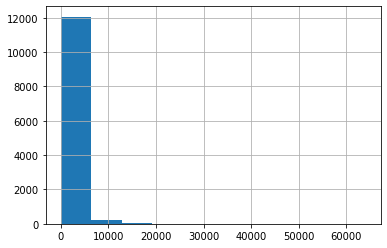

In [ ]:
df['ProductRelated_Duration'].hist()

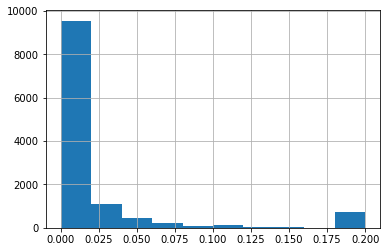

In [ ]:
df['BounceRates'].hist()

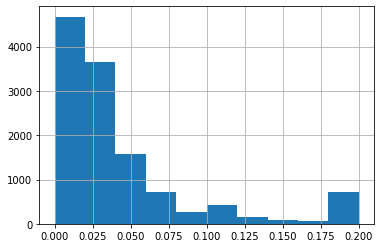

In [ ]:
df['ExitRates'].hist()

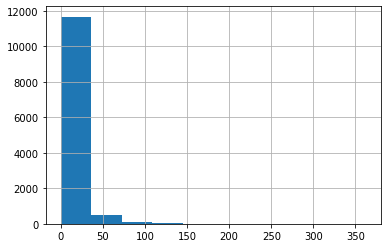

In [ ]:
df['PageValues'].hist()

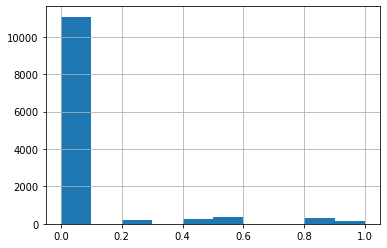

In [ ]:
df['SpecialDay'].hist()

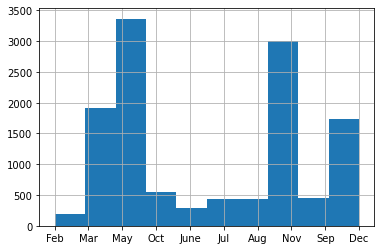

In [ ]:
df['Month'].hist()

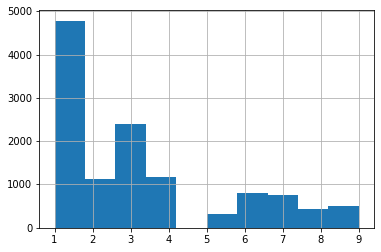

In [ ]:
df['Region'].hist()

## ii) Data pre-processing: 

In [ ]:
import pandas as pd 

# Get a new copy of df data. 
# We ignore 'OperatingSystems', 'Browser' as they are useless for machine learnign.

df = pd.read_csv('/content/sample_data/Coursework_1_data.csv')
df.drop(['OperatingSystems', 'Browser'], axis=1, inplace = True)

pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)
print(df)

df_x = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues','SpecialDay', 'Month', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]
df_y = df[['Revenue']]

print(df_x.head(20))

       Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  Region  TrafficType        VisitorType  Weekend  Revenue
0                   0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000    0.000000         0.0   Feb       1            1  Returning_Visitor    False    False
1                   0                      0.0              0                     0.0               2                64.000000     0.000000   0.100000    0.000000         0.0   Feb       1            2  Returning_Visitor    False    False
2                   0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000    0.000000         0.0   Feb       9            3  Returning_Visitor    False    False
3                   0                      0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend
8077,0,0.000000,0,0.0,5,81.083333,0.04,0.050000,0.000,0.0,Dec,1,2,New_Visitor,False
1568,0,0.000000,0,0.0,3,189.000000,0.00,0.066667,0.000,0.0,Mar,8,1,Returning_Visitor,False
462,0,0.000000,1,132.0,8,445.000000,0.00,0.014286,0.000,0.0,Mar,4,14,Returning_Visitor,True
743,0,0.000000,0,0.0,3,0.000000,0.20,0.200000,0.000,0.0,Mar,2,1,Returning_Visitor,False
222,0,0.000000,0,0.0,4,14.000000,0.10,0.150000,0.000,0.0,Mar,1,1,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14,1005.608333,0,0.0,25,732.344872,0.00,0.015676,0.000,0.0,Nov,1,2,Returning_Visitor,False
5191,0,0.000000,0,0.0,14,340.000000,0.00,0.015385,23.388,0.0,May,3,1,Returning_Visitor,True
5390,0,0.000000,0,0.0,3,189.000000,0.00,0.066667,0.000,0.0,May,3,4,Returning_Visitor,False
860,0,0.000000,0,0.0,13,305.000000,0.00,0.016667,0.000,0.0,Mar,1,2,New_Visitor,False


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_transformer

# transformer for categorical features
categorical_features = ['Month', 'VisitorType', 'Weekend']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Region', 'TrafficType']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)


titanic_processed = preprocessor.fit_transform(df_x)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)

print(titanic_processed[0:20, :])

[[ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.69 -0.62  3.67  3.23 -0.32 -0.31 -0.89 -0.76]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.67 -0.59 -0.46  1.17 -0.32 -0.31 -0.89 -0.51]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.69 -0.62  3.67  3.23 -0.32 -0.31  2.44 -0.27]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.67 -0.62  0.57  1.99 -0.32 -0.31 -0.48 -0.02]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    1.   -0.7  -0.46 -0.4  -0.24 -0.49 -0.3  -0.05  0.14 -0.32 -0.31 -0.89 -0.02]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.29 -0.54 -0.13 -0.38 -0.32 -0.31 -0.89 -0.27]
 [ 0.    0

## iii) Model implementation :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

myClassfier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('classifier', KNeighborsClassifier())
    ]
)

In [ ]:
myClassfier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categoricals',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'VisitorType',
                                                   'Weekend']),
                                                 ('numericals',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                          

## iv) Performance evaluation : 

In [ ]:
from sklearn.metrics import accuracy_score  

y_pred = myClassfier.predict(X_test)  # accuracy
accuracy_score(y_test, y_pred)

0.8769937821032712

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_train['Month']=LabelEncoder().fit_transform(X_train['Month'])
X_train['VisitorType']=LabelEncoder().fit_transform(X_train['VisitorType'])
X_train['Weekend']=LabelEncoder().fit_transform(X_train['Weekend'])
X_test['Month']=LabelEncoder().fit_transform(X_test['Month'])
X_test['VisitorType']=LabelEncoder().fit_transform(X_test['VisitorType'])
X_test['Weekend']=LabelEncoder().fit_transform(X_test['Weekend'])

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


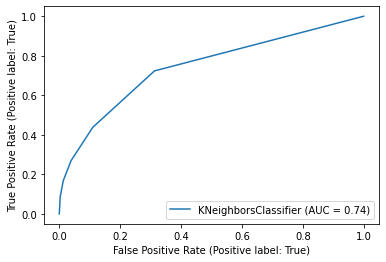

In [ ]:
from sklearn.metrics import roc_curve,auc,plot_roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

rf = KNeighborsClassifier(algorithm='kd_tree')
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_test)[:,1]
plot_roc_curve(rf,X_test,y_test)

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='weighted'))

0.864609103972981


In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(precision)
print(recall)
print(thresholds)

[0.16 0.67 1.  ]
[1.   0.41 0.  ]
[False  True]


# 2-SVM

In [ ]:
import pandas as pd 
import numpy as np

#import os
#os.chdir("C:/Users/scmyl5/OneDrive - Cardiff University/Teaching/CMT307/Practical")
#dataset = pd.read_csv('creditcard.csv')

## Get data

In [ ]:
dataset = pd.read_csv('/content/sample_data/Coursework_1_data.csv')

## i) Data exploration:

In [ ]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## ii) Data pre-processing:

In [ ]:
try:
  dataset.drop([ 'OperatingSystems', 'Browser'], axis=1, inplace = True)
except KeyError:
  print('Attributes already removed')

print(dataset.head(10))

   Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  Region  TrafficType        VisitorType  Weekend  Revenue
0               0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000         0.0         0.0   Feb       1            1  Returning_Visitor    False    False
1               0                      0.0              0                     0.0               2                64.000000     0.000000   0.100000         0.0         0.0   Feb       1            2  Returning_Visitor    False    False
2               0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000         0.0         0.0   Feb       9            3  Returning_Visitor    False    False
3               0                      0.0              0   

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
dataset['Month']=LabelEncoder().fit_transform(dataset['Month'])
dataset['VisitorType']=LabelEncoder().fit_transform(dataset['VisitorType'])
dataset['Weekend']=LabelEncoder().fit_transform(dataset['Weekend'])
dataset['Revenue']=LabelEncoder().fit_transform(dataset['Revenue'])

## iii) Model implementation:

In [ ]:
X = dataset[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues','SpecialDay', 'Month', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]
y = dataset[['Revenue']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [ ]:
classifier = svm.SVC()

In [ ]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_train_pred = classifier.predict(X_train)
yhat = classifier.predict(X_test)

## iv) Performance evaluation:

In [ ]:
accurary = accuracy_score(y_test,yhat) *100
print("Accurary: %2f%%" % accurary )

Accurary: 84.617464%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


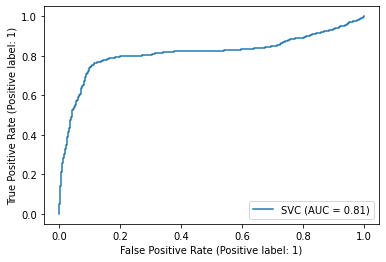

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc,plot_roc_curve, roc_auc_score

rf = SVC(probability=True)
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_test)[:,1]
plot_roc_curve(rf,X_test,y_test)

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
print(precision)
print(recall)
print(thresholds)

[0.16 0.88 1.  ]
[1.   0.01 0.  ]
[0 1]


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, yhat, average='weighted'))

0.7777718183978911


# 3-Decision Tree

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Get data

In [ ]:
df = pd.read_csv('/content/sample_data/Coursework_1_data.csv')  # where the data is stored on google drive
test = pd.read_csv('/content/sample_data/Coursework_1_data.csv')

## ii) Data pre-processing:

In [ ]:
# Get a new copy of df data. 

df = pd.read_csv('/content/sample_data/Coursework_1_data.csv')
df.drop(['OperatingSystems', 'Browser'], axis=1, inplace = True)

pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)
print(df)

df_x = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues','SpecialDay',  'Region', 'TrafficType']]
df_y = df[['Revenue']]

print(df_x.head(20))

       Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  Region  TrafficType        VisitorType  Weekend  Revenue
0                   0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000    0.000000         0.0   Feb       1            1  Returning_Visitor    False    False
1                   0                      0.0              0                     0.0               2                64.000000     0.000000   0.100000    0.000000         0.0   Feb       1            2  Returning_Visitor    False    False
2                   0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000    0.000000         0.0   Feb       9            3  Returning_Visitor    False    False
3                   0                      0

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
dataset['Month']=LabelEncoder().fit_transform(df['Month'])
dataset['VisitorType']=LabelEncoder().fit_transform(df['VisitorType'])
dataset['Weekend']=LabelEncoder().fit_transform(df['Weekend'])
dataset['Revenue']=LabelEncoder().fit_transform(df['Revenue'])

## iii) Model implementation:

[Text(167.4, 181.2, 'X[8] <= 0.945\ngini = 0.262\nsamples = 12330\nvalue = [10422, 1908]'),
 Text(83.7, 108.72, 'X[4] <= 68.5\ngini = 0.077\nsamples = 9662\nvalue = [9276, 386]'),
 Text(41.85, 36.23999999999998, 'gini = 0.061\nsamples = 8891\nvalue = [8610, 281]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.235\nsamples = 771\nvalue = [666, 105]'),
 Text(251.10000000000002, 108.72, 'X[6] <= 0.0\ngini = 0.49\nsamples = 2668\nvalue = [1146, 1522]'),
 Text(209.25, 36.23999999999998, 'gini = 0.39\nsamples = 1188\nvalue = [315, 873]'),
 Text(292.95, 36.23999999999998, 'gini = 0.492\nsamples = 1480\nvalue = [831, 649]')]

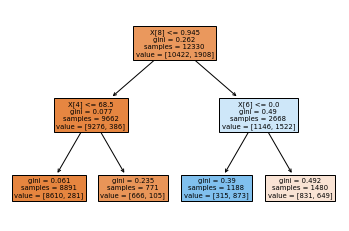

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(df_x, df_y)
plot_tree(tree_clf, filled=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Region,TrafficType
8077,0,0.000000,0,0.0,5,81.083333,0.04,0.050000,0.000,0.0,1,2
1568,0,0.000000,0,0.0,3,189.000000,0.00,0.066667,0.000,0.0,8,1
462,0,0.000000,1,132.0,8,445.000000,0.00,0.014286,0.000,0.0,4,14
743,0,0.000000,0,0.0,3,0.000000,0.20,0.200000,0.000,0.0,2,1
222,0,0.000000,0,0.0,4,14.000000,0.10,0.150000,0.000,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14,1005.608333,0,0.0,25,732.344872,0.00,0.015676,0.000,0.0,1,2
5191,0,0.000000,0,0.0,14,340.000000,0.00,0.015385,23.388,0.0,3,1
5390,0,0.000000,0,0.0,3,189.000000,0.00,0.066667,0.000,0.0,3,4
860,0,0.000000,0,0.0,13,305.000000,0.00,0.016667,0.000,0.0,1,2


In [ ]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train,y_train) 
result = clf.score(X_test,y_test) 
y_pred = clf.predict(X_test)

## iv) Performance evaluation:

In [ ]:
result

0.849418761827521

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


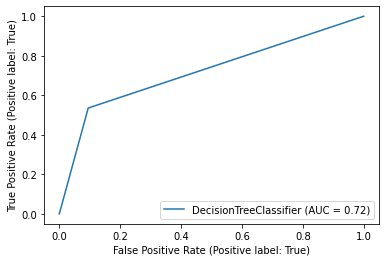

In [ ]:
from sklearn.metrics import roc_curve,auc,plot_roc_curve, roc_auc_score

rf = DecisionTreeClassifier()
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_test)[:,1]
plot_roc_curve(rf,X_test,y_test)

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(precision)
print(recall)
print(thresholds)

[0.16 0.51 1.  ]
[1.   0.55 0.  ]
[False  True]


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='weighted'))

0.8516107497483282
